# Prepare

In [5]:
from SHZX_Modal_identification import *

## 数据批量导出

In [ ]:
# 数据展示可以对单测点进行导出，此处是为了方便批量导出
date_start = '2018-07-11'; date_end = '2018-07-11'
code_list = ['ZD-117-01','ZD-117-02','ZD-117-03','ZD-117-04',
             'ZD-124-01','ZD-124-02','ZD-124-03','ZD-124-04',
             'ZD-125-01','ZD-125-02','ZD-125-03','ZD-125-04',
             'FS-132-01','FS-132-02'
              ]
date_list = get_date_list(date_start, date_end)
data_export(code_list, date_list)

## 绘制设备可用性视图

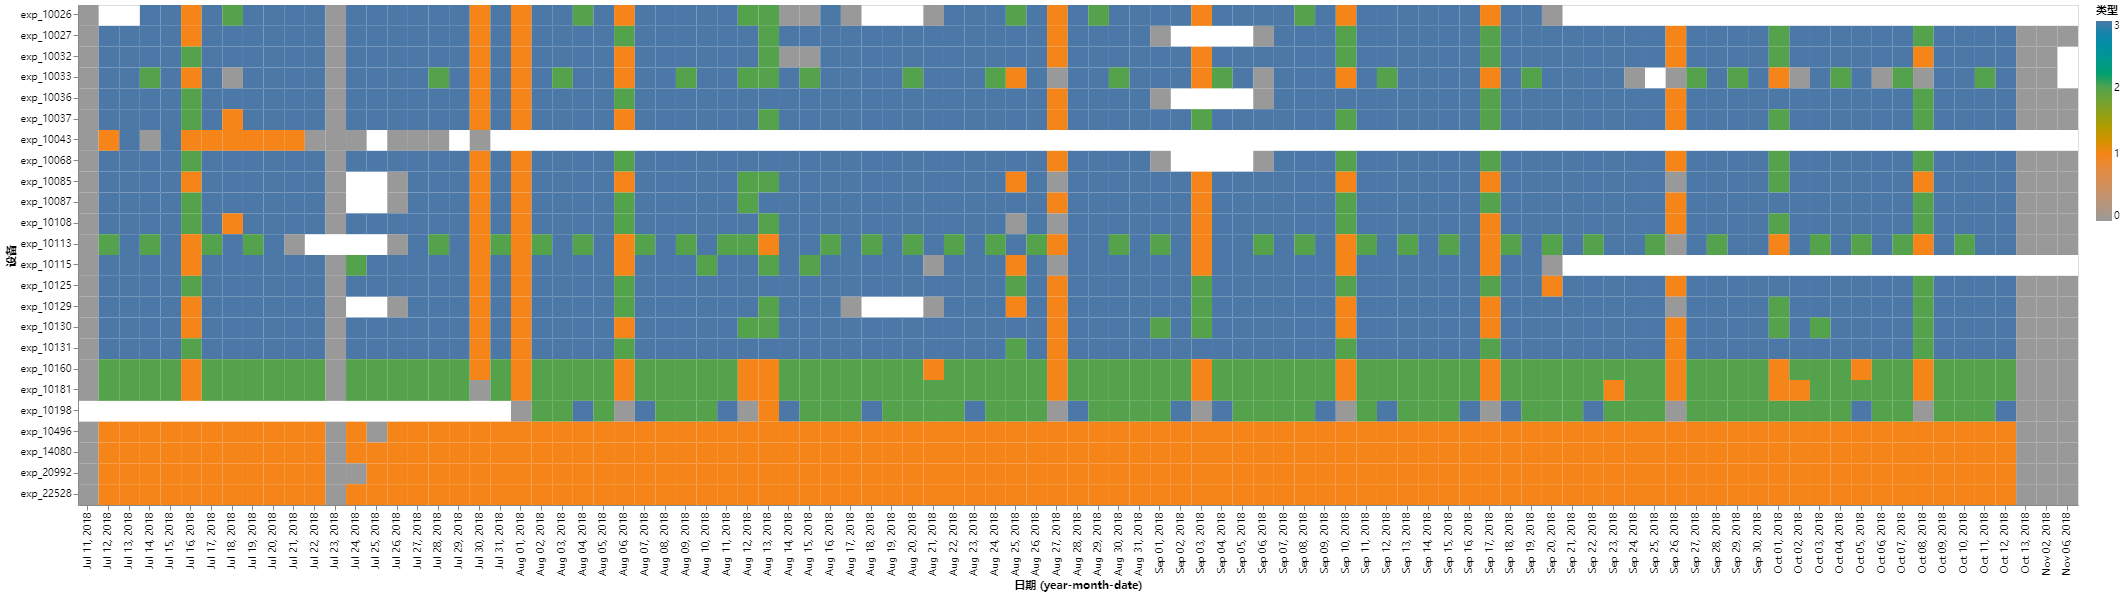

In [6]:
equipment_availability()

## 绘制测点可用性视图

In [ ]:
i_code = 'ZD-117-01'
which_dates_are_good(i_code)

# 数据分析

## ZD_std

In [ ]:
i_code_list = ['ZD-124-01']
date_start = '2018-8-16'
date_end = '2018-8-17'
resample_frequency = '2T'
for i_code in i_code_list:
    # which_dates_are_good(i_code) # 查看该测点的哪些时间段可用
    data = get_data_std(i_code, date_start, date_end, resample_frequency)
    draw_ZD(data, i_code)

## Peak-Picking

In [ ]:
# 参数设置
long = 5                    # 按分钟计，用于计算的数据长度
Fs = 100                    # 采样频率
new_f = 100                 # 降采样频率（避免滤波时数据溢出），也可用于增采样
filtering = [0.05,10]       # 通带频率、阻带频率
PSDfangfa = 1               # 1为周期图法，2为多个周期图平均法
m = 2                       # 平均周期图法的平分数
if_log = 0                  # 是否对结果取对数
draw = 0                    # 是否绘图
draw_matlab = 0             # 是否用matlab作图
percent = 10                # 峰值下限取最高点的百分之几
minpeakdist = 0.05          # 峰值之间最小距离

i_code_list = ['ZD-124-01', 'ZD-124-03'] # 一个也行
date_start = '2018-8-16 5:0:0'; date_end = '2018-8-18 5:0:0'
f = Peak_Picking(i_code_list,date_start,date_end,long,Fs,new_f,filtering,PSDfangfa,m,if_log,draw,draw_matlab,percent,minpeakdist)
f

## SSICOV

In [ ]:
# 参数设置
long = 5                # 按分钟计，用于计算的数据长度
Ts = 10                 # 按秒计 time lag for covariance calculation
Fs = 100                # 采样频率
new_f = 100             # 降采样频率（避免滤波时数据溢出），也可用于增采样
filtering = [0.05,10]   # 通带频率、阻带频率
if_log = 0              # 是否取对数
draw = 0                # 是否绘图
draw_matlab = 0         # 是否用matlab绘图
Xrange = [0,1]          # 绘图x轴范围
eps_freq = 1e-3         # 相对误差(频率)

i_code_list = ['ZD-124-01', 'ZD-124-03'] # 起码有两个
date_start = '2018-8-16 5:0:0'; date_end = '2018-8-18 5:0:0'
f = SSICOV(i_code_list,date_start,date_end,long,Ts,Fs,new_f,filtering,if_log,draw,draw_matlab,Xrange,eps_freq)
f